In [1]:
import os
import skimage.io as io
import pandas as pd
import numpy as np
import skimage.morphology
import skimage.segmentation
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
F1_halfIoU_csv_path = r"D:\nuclear_seg\root_HT\F1_halfIoU_csv\F1"
halfIoU_viz_path = r"D:\nuclear_seg\root_HT\halfIoU_evaluation\box.png"

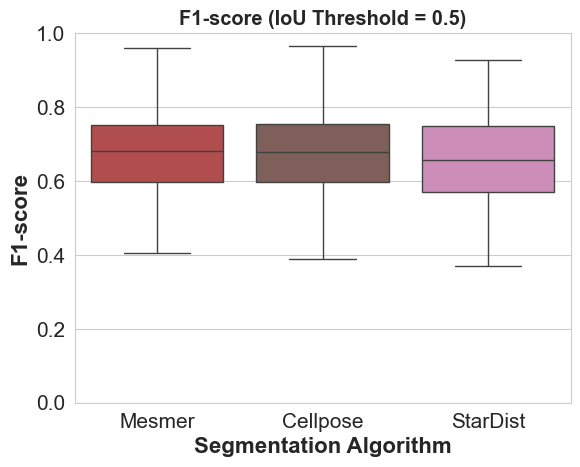

In [3]:
halfIoU_df_list = []
for csv_file in os.listdir(F1_halfIoU_csv_path):
    halfIoU_df_list.append(pd.read_csv(os.path.join(F1_halfIoU_csv_path,
                                                    csv_file)))
# Concatenating the dataframes into one big dataframe
combined_halfIoU_df = pd.concat(halfIoU_df_list)
### combined_halfIoU_df = combined_halfIoU_df.rename(
###     columns={"CellPose": "Cellpose", "InForm": "inForm®"})
# plt.figure(figsize=(4,5))
# creating barplot with 95% confidence interval and formatting
F1_barplot_combined = sns.boxplot(combined_halfIoU_df, palette=['#c03d3e', '#845b53', '#d684bd'], showfliers=False)
F1_barplot_combined.set_xlabel(
    xlabel="Segmentation Algorithm", fontweight="bold", fontsize=16
)
F1_barplot_combined.set_ylabel(
    ylabel="F1-score", fontweight="bold", fontsize=16
)
F1_barplot_combined.set_title(
    label="F1-score (IoU Threshold = 0.5)", fontweight="bold",
    fontsize="x-large"
)
plt.xticks(fontweight="regular", fontsize=15)
plt.yticks(np.arange(0.0, 1.01, step=0.2), fontweight="regular",
            fontsize=15)
# saving plot to output directory
plt.savefig(halfIoU_viz_path, dpi=500, bbox_inches='tight')